# Palmer Penguins Modeling

In [21]:
# Code Here
!pip install palmerpenguins
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sys import exit
import matplotlib.pyplot as plt

In [22]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [23]:
penguins = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "sex", "species", "island"])
columns_species_island = pd.get_dummies(penguins[["species", "island"]])
colums_sex = pd.get_dummies(penguins["sex"], drop_first=True)
df = penguins.drop(["species", "island", "sex"], axis=1)
df = pd.concat([df, columns_species_island, colums_sex], axis=1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [24]:
y = df["bill_depth_mm"]
X = df[["bill_length_mm"]]

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

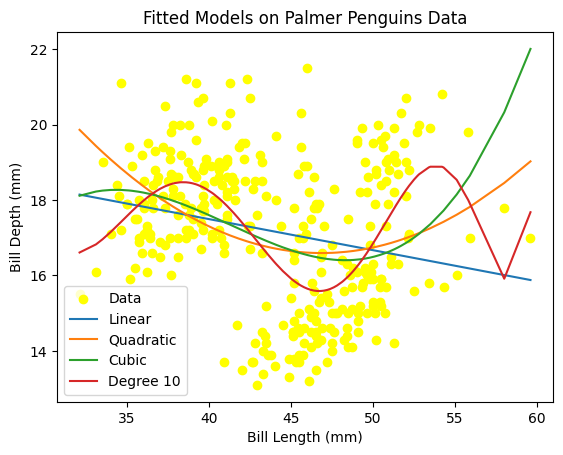

In [25]:
def create_pipeline(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("ols", LinearRegression())
    ])

linear_model = create_pipeline(1)
linear_model.fit(X, y)
y_linear = linear_model.predict(X)

quadratic_model = create_pipeline(2)
quadratic_model.fit(X, y)
y_quadratic = quadratic_model.predict(X)

cubic_model = create_pipeline(3)
cubic_model.fit(X, y)
y_cubic = cubic_model.predict(X)

degree10_model = create_pipeline(10)
degree10_model.fit(X, y)
y_degree10 = degree10_model.predict(X)
sorted_indices = X.squeeze().argsort()
X_sorted = X.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]

y_linear_sorted = y_linear[sorted_indices]
y_quadratic_sorted = y_quadratic[sorted_indices]
y_cubic_sorted = y_cubic[sorted_indices]
y_degree10_sorted = y_degree10[sorted_indices]

plt.scatter(X_sorted, y_sorted, color = "Yellow", label = "Data")
plt.plot(X_sorted, y_linear_sorted, label = "Linear")
plt.plot(X_sorted, y_quadratic_sorted, label = "Quadratic")
plt.plot(X_sorted, y_cubic_sorted, label = "Cubic")
plt.plot(X_sorted, y_degree10_sorted, label = "Degree 10")
plt.legend()
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Fitted Models on Palmer Penguins Data")
plt.show()
